In [5]:
import nltk
from nltk import TokenSearcher
from nltk.corpus import udhr
from nltk.corpus import brown
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt
%matplotlib inline

import random
import re
import numpy as np
from collections import defaultdict

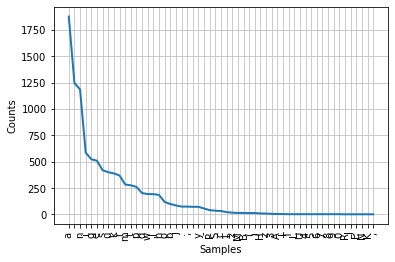

In [11]:
"""
Your Turn: Pick a language of interest in udhr.fileids(), and define a variable 
raw_text = udhr.raw(Language-Latin1). Now plot a frequency distribution of the letters 
of the text using nltk.FreqDist(raw_text).plot().
"""
raw_text = udhr.raw('Balinese-Latin1')
plt.figure()
nltk.FreqDist(raw_text).plot()
plt.show()

Your Turn: Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. ['Monday', ...]. Now tabulate the counts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: samples=['Monday', ...].

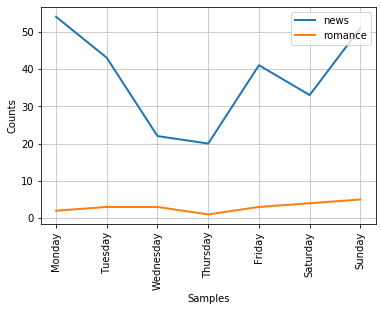

In [12]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
categories = ['news', 'romance']
cfd = nltk.ConditionalFreqDist(
                            (category,word)
                            for category in categories
                            for word in brown.words(categories = category))
cfd.plot(samples=days)

Generating random text

In [ ]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams) 
generate_model(cfd, 'what')

wordnet

In [ ]:
wn.synsets('act')
wn.synset('act.v.02').hypernyms()

In [ ]:
len(list(wn.all_synsets('n')))

# Zipf

In [ ]:
def zipf(text):
    """text is a list of tokens, or is otherwise transformed into one"""
    if type(text) == str:
        text = s.split()
    
    unique_words = set(text)
    fdist = nltk.FreqDist(w.lower() for w in text)
    ranks = [] #dict() #the inverse of fdist
    for k in fdist.keys():
        ranks.append(fdist[k])
    ranks = sorted(ranks)
    freqs = [1/r for r in ranks]
    return ranks, freqs
    
s_arrs = []
for alphabet in ["ab ", "abcdefg ", "abcdefgheijkl ", "abcdefghijklmnopqrstuvwxyz "]:
    s = ""
    for i in range(10000):
        s = s + random.choice(alphabet)
    s_arrs.append(s)

plt.figure()
# for s in s_arrs:
#     x,y = zipf(s)
#     plt.loglog(x,y)
# plt.show()
x,y = zipf(s[1])
plt.loglog(x,y)
x,y = zipf(text)
plt.loglog(x,y)

## To extract findall from nltk.Text object, need to use [Token Searcher](https://stackoverflow.com/questions/34097316/findall-regular-expression-wont-assign-to-a-variable)

In [ ]:
news_tokens = brown.words(categories='news')
#fdist = nltk.FreqDist(w.lower() for w in news_tokens)
news_text = nltk.Text(news_tokens)
x = TokenSearcher(news_text).findall(r'<as> <\w*> <as> <\w*>')
x

In [ ]:
raw = """When I'M a Duchess,' she said to herself, (not in a very hopeful tone
 though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
 well without--Maybe it's always pepper that makes people hot-tempered"""
re.findall(r'\w+|\S\w*', raw)

# Chapter 4: programming stuff

also need to understand map, filter, dynamic programming, recursion more


In [ ]:
import networkx as nx

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) 
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    plt.show()

plt.figure(figsize=[18,12])
food = wn.synset('food.n.01')
graph = hyponym_graph(food)
graph_draw(graph)

In [8]:
text = nltk.word_tokenize("I'm going to bløngofolize this deempom with my smuggobulop")
nltk.pos_tag(text)

[('I', 'PRP'),
 ("'m", 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('bløngofolize', 'VB'),
 ('this', 'DT'),
 ('deempom', 'NN'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('smuggobulop', 'NN')]

In [3]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                 for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions())[10000:10020]:
    
    if len(data[word]) > 3:
        print(data[word])

In [8]:
pos = defaultdict(lambda: 'NOUN')
pos['daszd']

'NOUN'

# Ch 5

In [ ]:
words = nltk.corpus.words.words('en')
anagrams = defaultdict(list)
for word in words:
    key = ''.join(sorted(word))
    anagrams[key].append(word)

# anag_freq = defaultdict(int)
# for k in anagrams.keys():
#     anag_freq[k] = len(anagrams[k])

# plt.figure()
# plt.bar(list(anag_freq.keys()), anag_freq.values()) #this is really a hist
# plt.show()

hist_data = []
for k in anagrams.keys():
    hist_data += [k]*len(anagrams[k])
    
plt.figure()
plt.hist(hist_data, bins = 40, histtype='step')
plt.show()

# Ch 6

In [14]:
labeled_names = ([(name, 'male') for name in nltk.corpus.names.words('male.txt')] + [(name, 'female') for name in nltk.corpus.names.words('female.txt')])

def gender_features(word):
    return {'last_letter': word[-1]}

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.602


In [21]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] 

def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# ch 7

Chunking

In [3]:
nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN>+}  # Chunk two consecutive nouns"
cp = nltk.RegexpParser(grammar)
print(cp.parse(nouns))

(S (NP money/NN market/NN fund/NN))


In [9]:
cp = nltk.RegexpParser('4NOUNS: {<N.*>{7,}}')
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == '4NOUNS': print(subtree)

(4NOUNS Danny/NP Thomas/NP A./NP L./NP S./NP A./NP C./NP)
(4NOUNS
  has/NIL
  made/NIL
  about/NIL
  his/NIL
  pamphlet/NIL
  on/NIL
  Dunkirk/NIL
  and/NIL
  his/NIL
  Crisis/NIL)
(4NOUNS
  Then/NIL
  he/NIL
  launches/NIL
  into/NIL
  an/NIL
  attack/NIL
  on/NIL
  the/NIL
  Tory/NIL
  ministers/NIL)
(4NOUNS
  I/NIL
  had/NIL
  made/NIL
  many/NIL
  friends/NIL
  among/NIL
  them/NIL)
(4NOUNS
  taking/NIL
  part/NIL
  in/NIL
  their/NIL
  after-school/NIL
  games/NIL
  and/NIL
  trying/NIL
  desperately/NIL
  to/NIL
  translate/NIL
  Grimm's/NIL
  Fairy/NIL
  Tales/NIL
  into/NIL
  an/NIL)
(4NOUNS
  as/NIL
  a/NIL
  development/NIL
  program/NIL
  is/NIL
  being/NIL
  launched/NIL)
(4NOUNS
  commitments/NIL
  and/NIL
  obligations/NIL
  must/NIL
  be/NIL
  entered/NIL
  into/NIL
  in/NIL
  a/NIL
  given/NIL
  year/NIL
  which/NIL
  may/NIL
  exceed/NIL
  by/NIL
  twofold/NIL
  or/NIL
  threefold/NIL
  the/NIL
  expenditures/NIL
  to/NIL
  be/NIL
  made/NIL
  in/NIL
  that/NIL
  year/

### Chinking

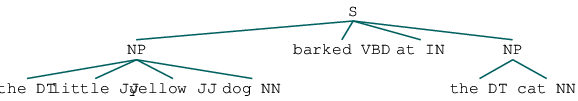

In [3]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)
cp.parse(sentence)

In [6]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents): 
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.UnigramTagger(train_data) 

    def parse(self, sentence): 
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags)]
        return nltk.chunk.conlltags2tree(conlltags)

In [9]:
test_sents = nltk.corpus.conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = nltk.corpus.conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [ ]:
# Natural Language Toolkit: code_classifier_chunker

def npchunk_features(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prevword, prevpos = "<START>", "<START>"
    else:
        prevword, prevpos = sentence[i-1]
    if i == len(sentence)-1:
        nextword, nextpos = "<END>", "<END>"
    else:
        nextword, nextpos = sentence[i+1]
    return {"pos": pos,
            "word": word,
            "prevpos": prevpos,
            "nextpos": nextpos, 
            "prevpos+pos": "%s+%s" % (prevpos, pos),  
            "pos+nextpos": "%s+%s" % (pos, nextpos),
            "tags-since-dt": tags_since_dt(sentence, i)}

def tags_since_dt(sentence, i):
    tags = set()
    for word, pos in sentence[:i]:
        if pos == 'DT':
            tags = set()
        else:
            tags.add(pos)
    return '+'.join(sorted(tags))

class ConsecutiveNPChunkTagger(nltk.TaggerI): # [_consec-chunk-tagger]

    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history) # [_consec-use-fe]
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.MaxentClassifier.train( # [_consec-use-maxent]
            train_set, algorithm='megam', trace=0)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = npchunk_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

class ConsecutiveNPChunker(nltk.ChunkParserI): # [_consec-chunker]
    def __init__(self, train_sents):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

chunker = ConsecutiveNPChunker(train_sents)
print(chunker.evaluate(test_sents))